# Task 1

Task 1: Build a **Multiple Linear Regression model** that predicts the number of deaths in various countries due to COVID-19. You are free to select and choose the dataset you would like to use while building the model and are allowed to use the Pandas Library in your code and can use Excel.

The following technical/tool constraint applies: you are NOT allowed to use any existing machine learning packages, such as scikit-learn.

As a general guide, you may need to undertake the following actions:
- Find data sets for the **number of deaths** in various countries **(a minimum of 20 countries)** due to COVID-19.
- Research for appropriate predictor variables to predict deaths due to COVID-19.
- You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
- Find data sets on the chosen predictors for the various countries in the model.
- Use **plots** to visualize and understand your data.
- Build a **model** and **test the accuracy of your model**, using an appropriately chosen metric(hint: r2 is not a good metric for this task).
- If needed, improve your model by incorporating other predictors, and/or removing existing ones.
- Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.

In [190]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load data 
We use data from [Our World in Data](https://github.com/owid/covid-19-data/blob/master/public/data/README.md) 

In [73]:
# importing the dataset by reading the csv file
pd.reset_option('display.max_rows')
df = pd.read_csv('covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134010,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134011,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134012,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134013,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Cleaning data

In [74]:
pd.set_option('display.max_rows', None)
print(pd.options.display.max_rows)
pd.reset_option('display.max_rows')

None


In [75]:
df.isna().sum()

iso_code                                        0
continent                                    8552
location                                        0
date                                            0
total_cases                                  7363
                                            ...  
human_development_index                     18110
excess_mortality_cumulative_absolute       129292
excess_mortality_cumulative                129292
excess_mortality                           129292
excess_mortality_cumulative_per_million    129292
Length: 67, dtype: int64

In [76]:
df.duplicated().sum()

0

### Visualising data

Target: `total_deaths`

Factors affecting death rates: (according to research)

*Factors we have data for and will explore are in **bold***

Healthcare Systems (healthcare capacity)
- `icu_patients`
- `icu_patients_per_million`
- `hosp_patients`
- `hosp_patients_per_million`
- `hospital_beds_per_thousand`
- `handwashing_facilities`

Nature of disease
- `reproduction_rate` (measure no of contacts per unit time)

National Policies
- `stringency_index` 
- `total_tests`
- `total_vaccinations`

Demographics/health
- `population_density`
- `aged_65_older` (Share of the population that is 65 years and older, most recent year available)
- ~~`cardiovasc_death_rate`~~
- ~~`diabetes_prevalence`~~

Economy
- `gdp_per_capita`
- `extreme_poverty`

Others
- `continent`
- `location`
- `date`


Text(0.5, 1.0, 'Total deaths vs date')

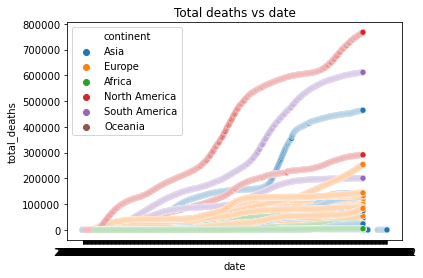

In [77]:
myplot = sns.scatterplot(x='date', y='total_deaths', hue='continent', data=df)
myplot.set_title('Total deaths vs date', fontsize=12)

In [78]:
columns_cat=['date','location','continent']
columns_num=['population_density','gdp_per_capita','total_deaths',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

df_cat = df.loc[((df['location']=='Austria')| (df['location']=='Belgium') | (df['location']=='Bulgaria') | (df['location']=='Croatia') | 
(df['location']=='Cyprus') | (df['location']=='Czech Republic') | (df['location']=='Denmark') | (df['location']=='Estonia') | (df['location']=='Finland') | 
(df['location']=='France') | (df['location']=='Germany') | (df['location']=='Greece') | (df['location']=='Hungary') | (df['location']=='Ireland') | 
(df['location']=='Italy') | (df['location']=='Latvia') | (df['location']=='Lithuania') | (df['location']=='Luxembourg') | 
(df['location']=='Malta') | (df['location']=='Netherlands') | (df['location']=='Poland') | (df['location']=='Portugal') | (df['location']=='Romania')| 
(df['location']=='Slovakia')| (df['location']=='Spain')| (df['location']=='Sweden')| (df['location']=='United Kingdom')| (df['location']=='United States')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns_cat]

df_num = df.loc[((df['location']=='Austria')| (df['location']=='Belgium') | (df['location']=='Bulgaria') | (df['location']=='Croatia') | 
(df['location']=='Cyprus') | (df['location']=='Czech Republic') | (df['location']=='Denmark') | (df['location']=='Estonia') | (df['location']=='Finland') | 
(df['location']=='France') | (df['location']=='Germany') | (df['location']=='Greece') | (df['location']=='Hungary') | (df['location']=='Ireland') | 
(df['location']=='Italy') | (df['location']=='Latvia') | (df['location']=='Lithuania') | (df['location']=='Luxembourg') | 
(df['location']=='Malta') | (df['location']=='Netherlands') | (df['location']=='Poland') | (df['location']=='Portugal') | (df['location']=='Romania')| 
(df['location']=='Slovakia')| (df['location']=='Spain')| (df['location']=='Sweden')| (df['location']=='United Kingdom')| (df['location']=='United States')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns_num]

# df_cat = df.loc[((df['location']=='Argentina')| (df['location']=='Australia') | (df['location']=='Brazil') | (df['location']=='Canada') | 
# (df['location']=='China') | (df['location']=='France') | (df['location']=='Germany') | (df['location']=='India') | (df['location']=='Indonesia') | 
# (df['location']=='Italy') | (df['location']=='Japan') | (df['location']=='Mexico') | (df['location']=='Russia') | (df['location']=='Saudi Arabia') | 
# (df['location']=='South Africa') | (df['location']=='South Korea') | (df['location']=='Turkey') | (df['location']=='United Kingdom') | 
# (df['location']=='United States') | (df['location']=='Singapore') | (df['location']=='Malaysia') | (df['location']=='Hong Kong')) &
# ((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns_cat]

# df_num = df.loc[((df['location']=='Argentina')| (df['location']=='Australia') | (df['location']=='Brazil') | (df['location']=='Canada') | 
# (df['location']=='China') | (df['location']=='France') | (df['location']=='Germany') | (df['location']=='India') | (df['location']=='Indonesia') | 
# (df['location']=='Italy') | (df['location']=='Japan') | (df['location']=='Mexico') | (df['location']=='Russia') | (df['location']=='Saudi Arabia') | 
# (df['location']=='South Africa') | (df['location']=='South Korea') | (df['location']=='Turkey') | (df['location']=='United Kingdom') | 
# (df['location']=='United States') | (df['location']=='Singapore') | (df['location']=='Malaysia') | (df['location']=='Hong Kong')) &
# ((df['date']> '2021-01-01') & (df['date']< '2021-11-17')),columns_num]

#(df['continent']=='Europe') |

In [184]:
def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

data_norm = normalize_minmax(df_num)
stats = data_norm.describe()
# display(stats)

frames=[df_cat , data_norm]
result = pd.concat(frames,axis=1)
result=result.fillna(0)
display(result)

,date,location,continent,population_density,gdp_per_capita,total_deaths,extreme_poverty,stringency_index,total_tests,total_vaccinations,reproduction_rate,handwashing_facilities,hospital_beds_per_thousand,hosp_patients_per_million,hosp_patients,icu_patients_per_million,icu_patients
7859,2021-01-02,Austria,Europe,0.061712,0.354930,0.008028,0.090909,0.906695,0.000000,0.000011,0.182891,0.0,0.891003,0.133064,0.013942,0.361155,0.013326
7860,2021-01-03,Austria,Europe,0.061712,0.354930,0.008092,0.090909,0.906695,0.005078,0.000011,0.188791,0.0,0.891003,0.133494,0.013987,0.340516,0.012564
7861,2021-01-04,Austria,Europe,0.061712,0.354930,0.008135,0.090909,0.906695,0.005098,0.000011,0.197640,0.0,0.891003,0.139867,0.014655,0.345207,0.012738
7862,2021-01-05,Austria,Europe,0.061712,0.354930,0.008266,0.090909,0.906695,0.005122,0.000015,0.206490,0.0,0.891003,0.145597,0.015255,0.348023,0.012841
7863,2021-01-06,Austria,Europe,0.061712,0.354930,0.008355,0.090909,0.906695,0.005157,0.000017,0.206490,0.0,0.891003,0.144809,0.015172,0.338641,0.012495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127132,2021-11-12,United States,North America,0.012168,0.471007,0.995702,0.181818,0.366739,1.000000,0.997140,0.000000,0.0,0.095156,0.081002,0.312446,0.286886,0.389706
127133,2021-11-13,United States,North America,0.012168,0.471007,0.996292,0.181818,0.366739,0.000000,0.999178,0.000000,0.0,0.095156,0.080549,0.310697,0.287963,0.391160
127134,2021-11-14,United States,North America,0.012168,0.471007,0.996449,0.181818,0.366739,0.000000,0.999790,0.000000,0.0,0.095156,0.081229,0.313324,0.287319,0.390295
127135,2021-11-15,United States,North America,0.012168,0.471007,0.998109,0.181818,0.366739,0.000000,1.000000,0.000000,0.0,0.095156,0.083321,0.321390,0.291068,0.395383


In [185]:
# export for normal eqn analysis
result.to_excel("covid_data_filtered.xlsx")  

/Users/shanghongsim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


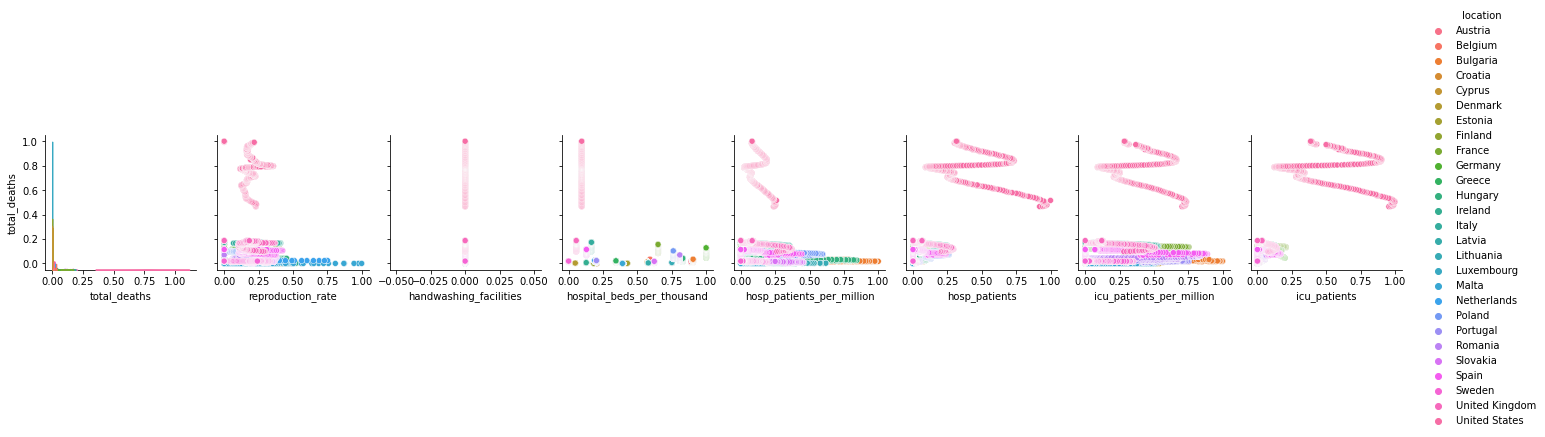

In [80]:
myplot = sns.pairplot(data=result, hue='location',x_vars=['total_deaths','reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients'],y_vars=['total_deaths'])

/Users/shanghongsim/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


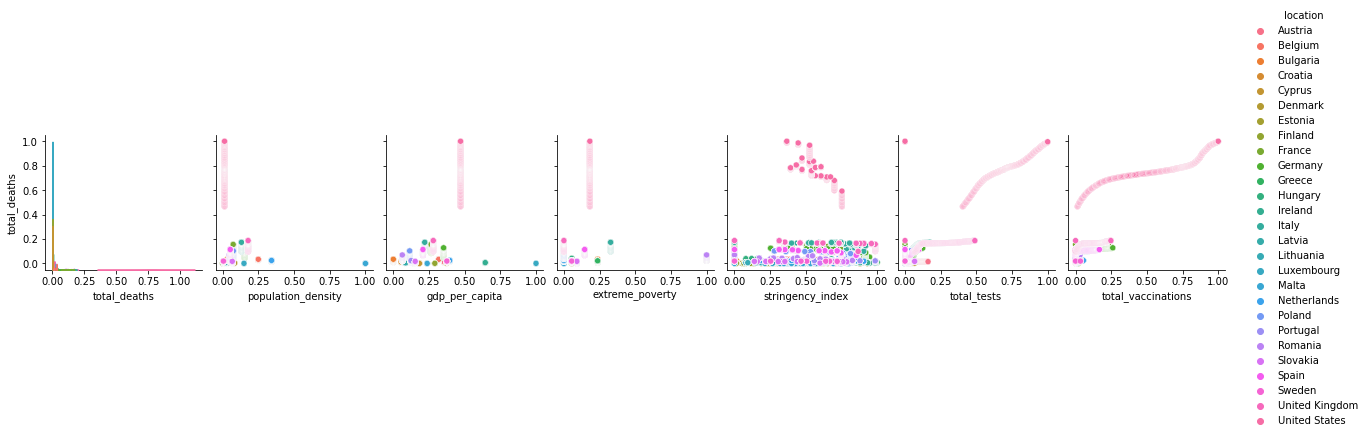

In [66]:
myplot = sns.pairplot(data=result, hue='location',x_vars=['total_deaths','population_density','gdp_per_capita',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations'],y_vars=['total_deaths'])

In [186]:
# feature=['population_density','gdp_per_capita',
#          'extreme_poverty','stringency_index','total_tests','total_vaccinations',
#          'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
#          'hosp_patients','icu_patients_per_million','icu_patients']
# df_feature=result.loc[:,feature]
# print(df_feature.shape)
# df_target=result.loc[:,['total_deaths']]
# print(df_target.shape)

In [187]:
def normalize_z(df):
    dfout=(df-df.mean(axis=0))/df.std(axis=0)
    return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature=df.loc[:,feature_names]
    df_target=df.loc[:,target_names]
    return df_feature, df_target

def compute_cost(X, y, beta):
    J = 0
    #calculate m, no of rows/data pt
    m = X.shape[0]
    
    #calculate yp, predicted target value from X and beta
    yp = np.matmul(X, beta)
    
    #calculate the error
    error = yp-y
    
    #calculate the cost
    J = (1/(2*m))*np.matmul(error.T, error)
    J= J[0][0] #to get the float
    return J

def prepare_feature(df_feature):
    #numpy is just arrays
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0],1))
    X = np.concatenate((array1, feature), axis = 1)
    return X

def prepare_target(df_target):
    return df_target.to_numpy() 

def gradient_descent(X, y, beta, alpha, num_iters):
    #calculate m from shape of X or y
    m = X.shape[0]
    J_storage = np.zeros(num_iters)

    #for the number of iterations
    for n in range(num_iters):
        #--> compute the predicted y
        yp = np.matmul(X, beta)
        
        #--> compute the error
        error = yp - y
        
        #--> compute the new beta
        beta = beta - (alpha/m)*np.matmul(X.T, error)
        
        #--> compute J using the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
        
    return beta, J_storage

def predict_norm(X, beta):
    y = np.matmul(X, beta)
    return y

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    X = prepare_feature(df_feature)
    yp = predict_norm(X, beta)
    return yp

def mean_squared_error(target, pred):
    n=target.shape[0]
    error=target-pred
    mse=(1/n)*np.sum(error**2)
    return mse

def r2_score(y, ypred):
    # calculate ssres
    diff = y - ypred
    ssres = np.matmul(diff.T, diff)[0][0]
    
    # calculate sstot
    ymean=np.mean(y)
    diff_mean=y-ymean #element wise subtraction
    sstot= np.matmul(diff_mean.T, diff_mean)[0][0]
    
    # calcuate r2
    return 1-(ssres/sstot)

In [189]:
# get features and targets from data frame
feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']
# df_feature=result.loc[:,feature]
# print(df_feature.shape)
# df_target=result.loc[:,['total_deaths']]
# print(df_target.shape)

df_feature, df_target = get_features_targets(result, feature, ['total_deaths'])

# normalize the feature using z normalization
# df_feature = normalize_z(df_feature)
# print(df_feature.describe())
X = prepare_feature(df_feature)
# print(X)
m=X.shape[1]
target = prepare_target(df_target)

iterations = 1500
alpha = 0.01
beta = np.zeros((m,1))

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
# print('---',beta)

# call the predict method to get the predicted values
pred = predict(df_feature, beta)
with np.printoptions(threshold=np.inf):
    print(beta)



# why the coeff different from norm eqn, look into matrix invertibility
#'handwashing_facilities',


[[ 0.0333334 ]
 [-0.0258047 ]
 [ 0.0333124 ]
 [ 0.02000423]
 [ 0.20273701]
 [ 0.19484473]
 [ 0.00339334]
 [-0.04295061]
 [-0.00296499]
 [ 0.10572453]
 [ 0.04854425]
 [ 0.12783466]]


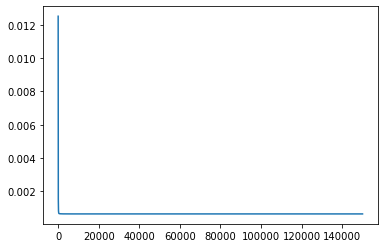

In [179]:
plt.plot(J_storage)

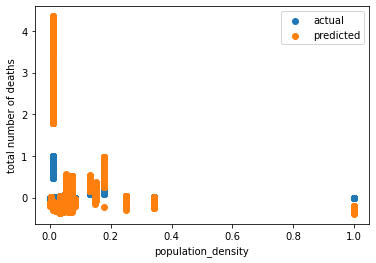

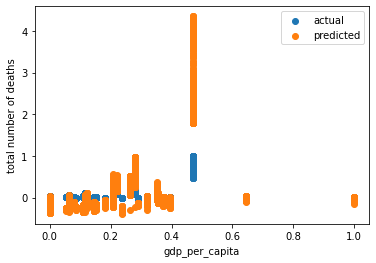

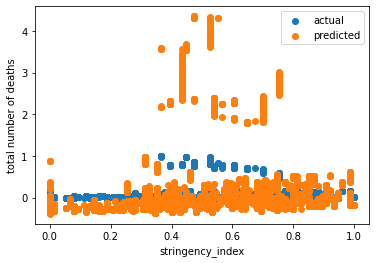

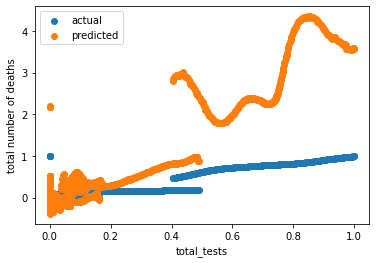

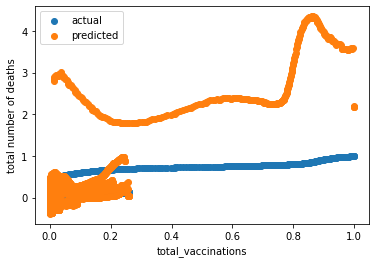

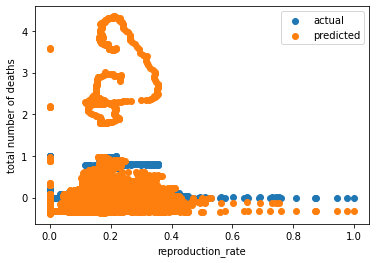

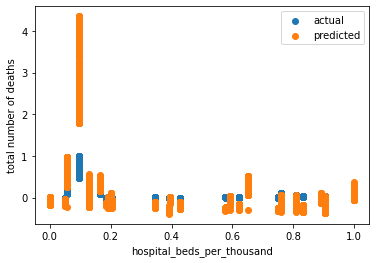

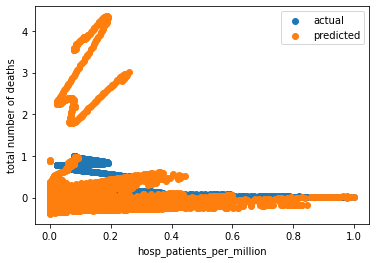

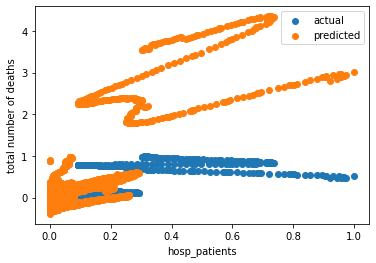

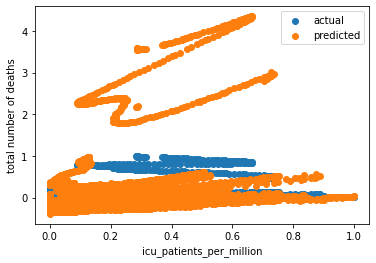

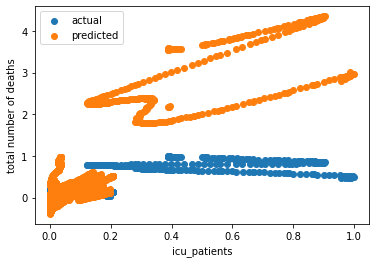

In [195]:
feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']
# df_feature=result.loc[:,feature]
pred = predict(df_feature, beta)

for i in range(len(feature)):
    ft=feature[i]
    plt.figure(i)
    plt.scatter(df_feature[ft],target)
    plt.scatter(df_feature[ft],pred)
    plt.xlabel(ft)
    plt.ylabel('total number of deaths')
    plt.legend(['actual','predicted'])


Improvements:
- cleaning data (quality of data)
- change of model

In [96]:
mse1=mean_squared_error(target,pred)
print(mse1)
# yes still meaningful, minimum mse with coeff
# if model is bad then mse may be big

# why in HW9 can use r2 for mult linreg and polynomial reg
r2_1=r2_score(target, pred)
print(r2_1)

0.0012769564059376176
0.9423699805421627


# Add polynomial regression

In [169]:
def transform_features(df_feature, colname, colname_transformed,power):
    df_out=df_feature.copy()
    df_out.loc[:,colname_transformed]=df_feature[colname]**power #dont use lambda function, handles stuff differently
    # print(df_feature)
    return df_out

In [170]:

# df_feature, df_target = get_features_targets(result, feature, ['total_deaths'])

feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

all={}
for i in range(1,5):
    df_feature, df_target = get_features_targets(result, feature, ['total_deaths'])
    df_feature = transform_features(df_feature, "hosp_patients", "hosp_patients^"+str(i),i)
    df_feature = transform_features(df_feature, "hosp_patients_per_million", "hosp_patients_per_million^"+str(i),i)
    df_feature = transform_features(df_feature, "icu_patients", "icu_patients^"+str(i),i)
    df_feature = transform_features(df_feature, "icu_patients_per_million", "icu_patients_per_million^"+str(i),i)
    
    # normalize the feature using z normalization
    df_feature = normalize_z(df_feature)
    # print(df_feature.describe())
    X = prepare_feature(df_feature)
    # print(X)
    m=X.shape[1]
    target = prepare_target(df_target)

    iterations = 1500
    alpha = 0.01
    beta = np.zeros((m,1))

    # call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
    # print('---',beta)

    # call the predict method to get the predicted values
    pred = predict(df_feature, beta)
    # print(pred)
    all[i]=pred

print(all[])


{1: array([[0.02464667],
       [0.02587543],
       [0.02562201],
       ...,
       [0.69212455],
       [0.69520669],
       [0.69246032]]), 2: array([[0.01629254],
       [0.01785761],
       [0.01754807],
       ...,
       [0.71987666],
       [0.72300073],
       [0.72015762]]), 3: array([[0.01509849],
       [0.01656433],
       [0.01616557],
       ...,
       [0.73710655],
       [0.74112772],
       [0.73747633]]), 4: array([[0.0162583 ],
       [0.01763223],
       [0.01726806],
       ...,
       [0.73977602],
       [0.74413313],
       [0.74003615]])}


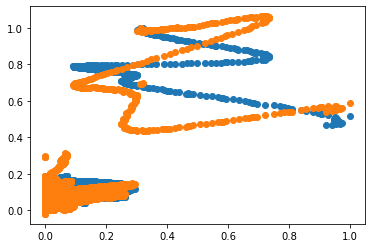

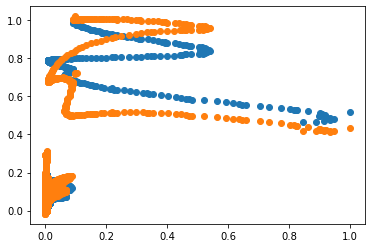

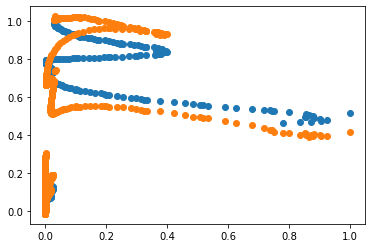

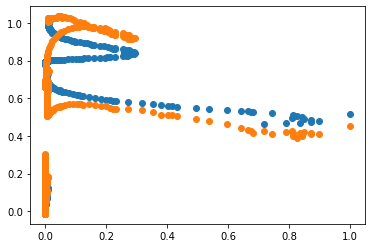

In [173]:
for i in range(1,5):
    pred=all[i]
    df_feature, df_target = get_features_targets(result, feature, ['total_deaths'])
    df_feature = transform_features(df_feature, "hosp_patients", "hosp_patients^"+str(i),i)
    df_feature = transform_features(df_feature, "hosp_patients_per_million", "hosp_patients_per_million^"+str(i),i)
    df_feature = transform_features(df_feature, "icu_patients", "icu_patients^"+str(i),i)
    df_feature = transform_features(df_feature, "icu_patients_per_million", "icu_patients_per_million^"+str(i),i)
    
    plt.figure(i)
    plt.scatter(df_feature['hosp_patients^'+str(i)],target)
    plt.scatter(df_feature['hosp_patients^'+str(i)],pred)

0.0012723979952596449
0.9425757051031947
0.0009269359566369379
0.9581666711809695
0.0008982309224969351
0.9594621513307492
0.0009084124228495668
0.9590026524310971


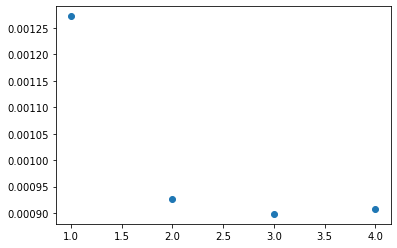

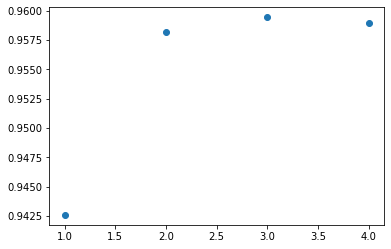

In [175]:
mse_all=[]
r2_all=[]
power=list(range(1,5))
for i in range(1,5):
    pred=all[i]
    mse2=mean_squared_error(target,pred)
    print(mse2)
    mse_all.append(mse2)

    # why in HW9 can use r2 for mult linreg and polynomial reg
    r2_2=r2_score(target, pred)
    print(r2_2)
    r2_all.append(r2_2)

plt.figure(6)
plt.scatter(power,mse_all)
plt.figure(7)
plt.scatter(power,r2_all)

# 2D meeting (21/11/21)

1. Joe's research
Key risk factors:
- age (85 and above)
- cardio disease
- death rates
- people vaccinated
- pop density
- hosp beds
- stringency index 
    - map 2 week's ago stringency index to today's death rate 
    - based on how long incubation to symptom to death

New way of calculating mortality
traditional: total death/ infected
modified: total death per day/ average number of infectiosn for past few days (icu cases for our case? KIV)

Things to do:
- HASS component (ST/ Henry)
    - Draft 1 (tues)
    - Dry run (wed)
- Find data for task 2 and confirm the question (Jen)
    - No mental health switch to economy
    - Use one of the backup question
    Question: Predict the economic health in the next financial quarter in post covid times
    Target: economic health (employment rate, growth rate)- pick one 
    Params:
    - infected rate/ death rate?
    - healthcare spending?
    - stringency
- SH to come up with prelim model (fix graph) by tmr
- filter out countries
    - similar gdp
    - choose big western europe countries 
- Joe incorporate comments into model to create v2
- Fradt ideas on website (SH)

-------------------

#### Mon
- HASS meeting after test
Agenda:
- fix the direction of the presentation
    - topic
    - which writer we are applying
    - main points and analysis
- leave the making of slides and script to ST and henry

#### Tues
- Math consult
- Meet Samson (3.30-4.30pm)

#### Wed
- HASS dry run
- UPOP (1-6pm, Jen, Joe, SH)

#### Thurs
- HASS presentation
- Polish task 1 and 2
- Film video

#### Fri
**Due time: 6pm**

Questions (georgious):

1. Why is the plot of pred vs a certain param not a straight line?
- the variable could have very little relation to the y (eg Y = 0 X1 + 10 X2)
- when you look at the plot of X1 against Y, you are projecting a higher dimension space into a lower dimension space
- the values of y could have been affected by many hidden variables that push it away from the expected linear relationship
- ie many small pertubations that push the the values of y away from the linear line with x

2. How did the model produce that curvy line that seems to model that particular parameter very well?
- the effect of many hidden variables?
- choosing a very good subset of variables?

3. Why is r2 not a good metric?
- you can use r2 to compare between diff models with same number of features
- not good to use r2 to compare between models with diff num of features because can always arbitarily increase r2 through increasing the number of features
- 

4. What metric should we use to evaluate the model?
- adjusted r square?

5. How can we use the relationships we observe to pick which features to raise to power? eg observe a pair plot with a log rs between x and y
- generally, we will not know the relation between a feature and y just from the pair plot. we use lin reg to figure out the relation between a feature and y
- we just try randomly transforming each feature
- a small case will if you see a log relationship and then you do a log transformation in the model on that feature

6. How do we compare our resulst from GS to normal equation? coeff or error?
- both
- Why is the coeff not exactly the same?
- norm equation assumes X is invertible so there is a unique solution. Is the matrix X invertible? Does the answer have to be unqiue? Can I compare the 2 mse?

7. Does the mse here even mean anything? We are deriving the beta from the train set then getting the predicted y from the same train set
- yes, we are evaluating the fit of the model to your data, just cannot see how well your model generalises (not the pt of this exercise)
- 